In [100]:
import numpy as np
import random

import matplotlib.pyplot as plt
def visualize_pattern(pattern,n,m):
    grid = pattern.reshape((n, m))
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='binary', interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

class HopfieldNetwork:
    def __init__(self,number_of_neurons):
        self.n = number_of_neurons
        self.w = np.zeros((number_of_neurons,number_of_neurons)) #Macierz wag
        self.b = np.zeros(number_of_neurons) #Wektor progów
            
    def get_patterns_hebb(self, patterns): #Uczenie paternów za pomocą reguły Hebba
        for i in range(len(patterns)): 
            self.w += np.outer(patterns[i], patterns[i])
        self.w /= len(patterns)
        self.w -= np.identity(self.n)
        
    def get_patterns_oja(self, patterns, learning_rate=0.01, epochs=20):  #Uczenie paternów za pomocą reguły Oja
        self.get_patterns_hebb(patterns)
        for _ in range(epochs):
            for p in patterns:
                p = p.reshape(self.n, 1)
                y = np.dot(self.w.T, p)
                self.w += learning_rate * self.w * (p - self.w * y)
                self.w = (self.w + self.w.T) / 2
            self.w /= len(patterns)
            np.fill_diagonal(self.w, 0)
        
    def activation(self,x,b):
        return np.where(x >= b, 1, -1)
    
    def update_rule_async(self, state):
        updated_state = state.copy()
        order = np.random.permutation(self.n)
        for i in order:
            net_input = np.dot(self.w[i, :], state)
            updated_state[i] = self.activation(net_input, self.b[i])
        return updated_state

    def update_rule_sync(self, state):
        net_inputs = np.dot(self.w, state)
        updated_state = self.activation(net_inputs, 0)
        return updated_state

    def energy(self, state):
        return -0.5 * np.dot(state, np.dot(self.w , state))
    
    def simulate(self, state, update_rule_type, max_steps=100, visualize=False, n=0,m=0):
        current_state = state.copy()
        current_energy = self.energy(current_state)
        for _ in range(max_steps):
            if(update_rule_type == 'sync'):
                next_state = self.update_rule_sync(current_state)
            elif (update_rule_type == 'async'):
                next_state = self.update_rule_async(current_state)
            next_energy = self.energy(next_state)
            if visualize:
                visualize_pattern(next_state, n,m)
            if np.array_equal(next_state, current_state):
                print("Network stabilized.")
                break
            elif next_energy >= current_energy:
                print("Energy increased, stopping update.")
                break
            current_state = next_state
            current_energy = next_energy
        return current_state

In [3]:
import csv
def read_patterns_from_csv(file_name):
    patterns = []
    with open(file_name, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            pattern = np.array([int(x) for x in row])
            patterns.append(pattern)
    return np.array(patterns)

(15, 625)
Network stabilized.


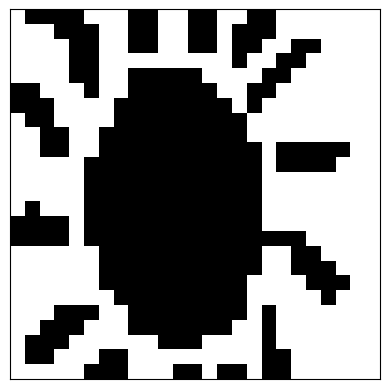

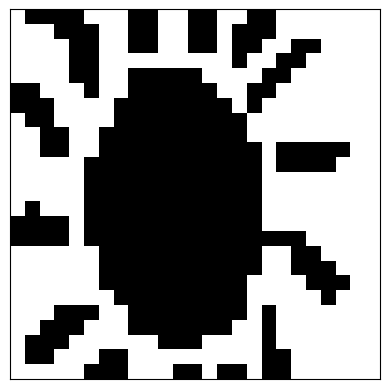

Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.


In [ ]:
patterns = read_patterns_from_csv('large-25x25.plus.csv')
print(patterns.shape)
n = 25
m = 25
# for p in patterns:

#     visualize_pattern(p,25,25)
training_sizes = []
correct_patterns = []
for i in range(1, patterns.shape[0] + 1):
    test_patterns = patterns[:i]
    net = HopfieldNetwork(n * m)
    net.get_patterns_oja(test_patterns, learning_rate=0.00001,epochs=10)
    correct = 0
    for pattern in test_patterns:
        noise = np.random.choice([-1, 1], size=n * m, p=[0.1, 0.9])  # 10% noise
        noisy_input = pattern * noise
        final_state = net.simulate(noisy_input, "sync")
        if (pattern.reshape(-1) == final_state.reshape(-1)).all():
            correct+=1
        if i == 1:
            visualize_pattern(pattern, n, m)
            visualize_pattern(final_state,n ,m)
    training_sizes.append(i)
    correct_patterns.append(correct)

print(correct_patterns)


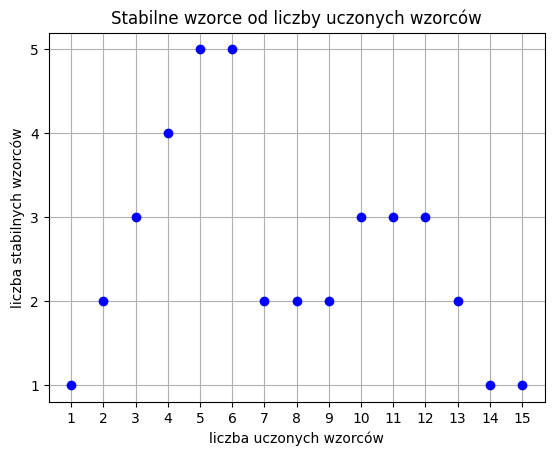

In [78]:
from matplotlib.pyplot import subplots
from matplotlib.ticker import MaxNLocator

fig, ax = subplots()
x = training_sizes
ax.grid()
y = correct_patterns
ax.scatter(x, y, color='blue', label='Points', zorder=3)  # Ensure points are on top

ax.set_ylabel('liczba stabilnych wzorców')
ax.set_xlabel('liczba uczonych wzorców')
ax.set_title('Stabilne wzorce od liczby uczonych wzorców')
ax.set_xticks(range(int(min(x)), int(max(x)) + 1))
ax.set_yticks(range(int(min(y)), int(max(y)) + 1))

In [124]:
patterns = read_patterns_from_csv('large-25x25.plus.csv')
net = HopfieldNetwork(25 * 25)

original_pattern = patterns[0]
net.get_patterns_hebb(patterns[0:1])
correct = 0
negative = 0;
for i in range(100000):
    noise = np.random.choice([-1, 1], size=25 * 25, p=[0.5, 0.5])  # 10% noise
    final_state = net.simulate(noise,'sync')
    if (original_pattern.reshape(-1) == final_state.reshape(-1)).all():
        correct += 1
    if (-1 * original_pattern.reshape(-1) == final_state.reshape(-1)).all():
        negative += 1
print(correct)
print(negative)

Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.
Network stabilized.


Original pattern


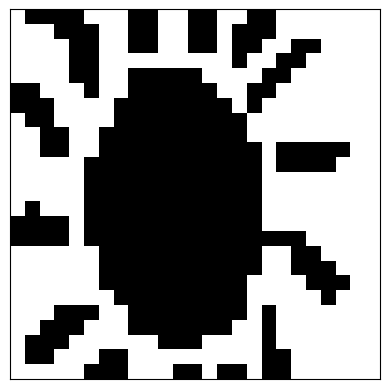

Input


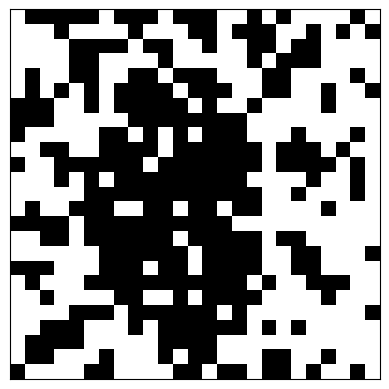

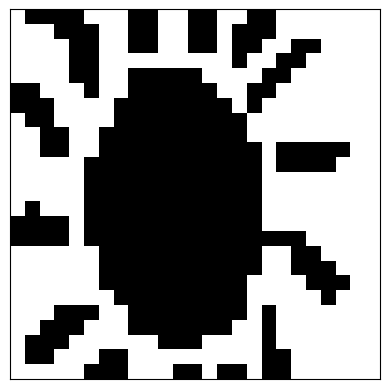

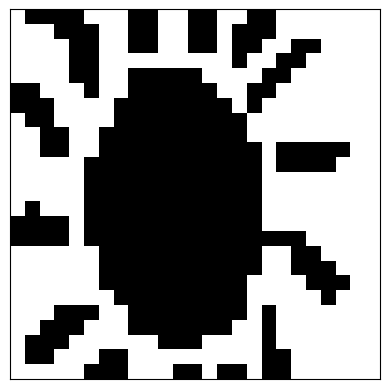

Network stabilized.


In [125]:
patterns = read_patterns_from_csv('large-25x25.csv')
net = HopfieldNetwork(25*25)
net.get_patterns_hebb(patterns)

original_pattern = patterns[0]
noise = np.random.choice([-1, 1], size=25*25, p=[0.2, 0.8])  # 10% noise
noisy_input = original_pattern * noise

print("Original pattern")
visualize_pattern(original_pattern,25,25)
print("Input")
visualize_pattern(noisy_input,25,25)
final_state =net. simulate(noisy_input,'sync', visualize=True, n=25,m=25)


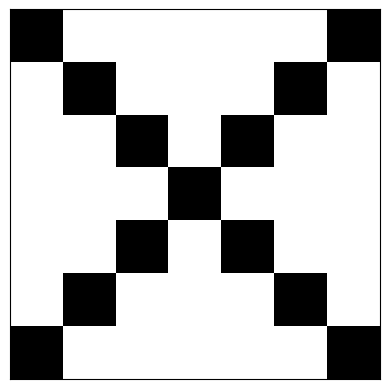

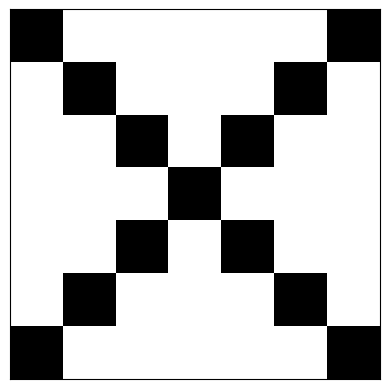

Network stabilized.


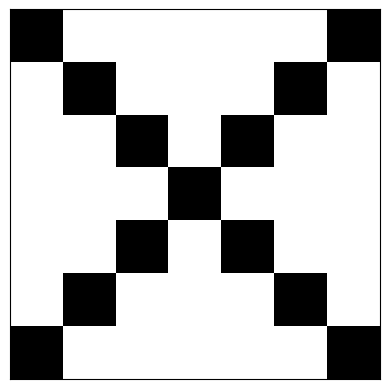

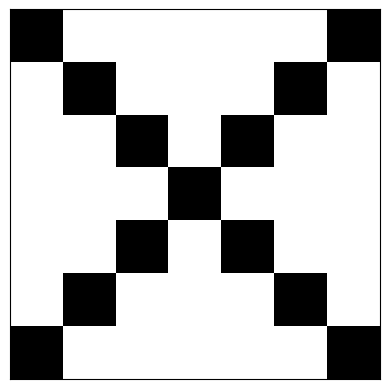

In [97]:
net_oja = HopfieldNetwork(49)
net_oja.get_patterns_oja(patterns[0:2])

original_pattern = patterns[0]
noise = np.random.choice([-1, 1], size=49, p=[0.3, 0.7])  # 10% noise
noisy_input = original_pattern * noise

final_state =net_oja. simulate(noisy_input,'async', visualize=True, n=7,m=7)

visualize_pattern(original_pattern,7,7)